In [16]:
# https://www.kaggle.com/teajay/climate-data-from-ocean-ships/journey-lengths-by-country/code
# imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#read in data
shipdata = pd.read_csv('C:\Users\Michael\projects\kaggle\ocean_logbooks\CLIWOC15.csv')
# clean up dataframe
shipdata.Nationality.replace('British ','British',inplace=True)
shipdata.LogbookLanguage.replace('British','English',inplace=True)

In [26]:
# subset data and create a pivot table and create a dataframe
ydc = shipdata[['Nationality','Year','Distance','DistTravelledUnits']]
pt = ydc.pivot_table(values='Distance',columns='Nationality',index='Year',aggfunc=sum,fill_value=0)
Yeardata = pd.DataFrame(index=list(range(1750,1851)))
set_years = pd.merge(Yeardata,pt,how='inner',left_index=True,right_index=True)
set_years['Year'] = set_years.index

In [28]:
print set_years.sum()

American        226.2500
British     7696851.0000
Danish         1706.3100
Dutch       1331669.3110
French        14736.0000
Hamburg        6667.0000
Spanish     2785825.3353
Swedish           0.0000
Year         181800.0000
dtype: float64


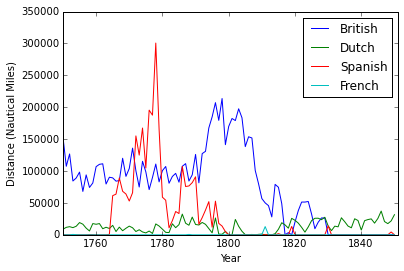

In [29]:
# create plot
plt.plot(set_years['Year'],set_years['British'])
plt.plot(set_years['Year'],set_years['Dutch'])
plt.plot(set_years['Year'],set_years['Spanish'])
plt.plot(set_years['Year'],set_years['French'])
plt.legend(['British','Dutch','Spanish','French'],loc='upper right')
plt.xlim([1750,1851])
plt.ylabel('Distance (Nautical Miles)')
plt.xlabel('Year')
plt.savefig("output.png")